SLAMming with Spheros
=====

##### IPython Notebook
The complete coverage is available in at [Coverage](https://github.com/srinivaskandasamy/Coverage/tree/master/aprilw2)

Weekly Report
====
***

Wednesday, April $22^{nd}$, 2015
----

### Meeting with Tamas
1. Wooden maze for the Spheros
    - Blueprint in consensus with Tamas and Kees
    - Further changes made lately
2. Wall correction to the maze made perfectly
3. Science symposium
    - Frank and myself will particiapte
    - We will make some practical stuff with the robot and put some videos
    - Draft work will be submitted 2-3 days before
    - Start to work from May 11

Thursday, April $23^{rd}$, 2015
----

### A Step towards SLAM (Analyzing the possible algorithms in hand)
1. Two possible solutions to the SLAM problem
    - Nonlinear least squares optimization (NLSO)
    - Particle filter solution (FastSLAM)
2. The NLSO method is very good at solving the SLAM problem
    - Escapes local minima using stochastic gradient search
    - Efficient incorporation of observation into the current estimate
    - Jacobian involved is sparse which aids in exploiting further computational efficiency
3. NLSO also comes with problem with respect to constraints which are difficult to incorporate
    - Orthogonality, Equal corridor width
    - Wall constraints
    - Nonlinear and discontinuous robot pose distribution - Gaussian cannot fit this
4. The particle filter solution to SLAM, which is the state-of-the-art in SLAM, is most suitable to our situation
    - FastSLAM is solved with occupancy grid maps
    - It can incorporate constraints of any form
    - The solution is known to produce more accurate maps even when the vehicle pose error is very large
    - The solution can be easily integrated at any level (raw data or processed maps) from multiple robots

Monday, April $27^{th}$, 2015
----

### Components needed for FastSLAM algorithm
1. Particle fitler for the robot trajectory
    - Previous work on the robot tracking can be incorporated
    - The previous work contained prediction and resampling step
    - The particle filter must address the state of the robot as well as the map
    - Each particle must maintain a robot trajectory as well as a set of landmarks
2. Measurement data from the robot
    - Odometry data from the robot
    - Collision data from the robot's accelerometer
    - Both the data obtained from previous simulation results
    
### Modifying particle filters to SLAM (Not straightforward)
1. The modification from robot tracking data to SLAM is not straightforwards
2. The prediction step is currently a a FSM model
    - The next pose of the robot from prediction step is the pose with the next measurement
    - Static methods in python added to increase speed and pseudo-access of variables

Tuesday, April $28^{th}$, 2015
----

### Feature definition for collision-SLAM
1. The features are defined as point landmarks
2. This has to change in future since it is difficult to correct the landmarks on multiple detection of the same wall
3. The landmark is defined as a set of mean and covariances, and has to be propagated using EKF

### EKF filter for individual landmarks
1. EKF update step developed for landmarks
2. Measurement function and derivatives developed for landmarks

Wednesday to Friday, April $29^{th}$-May $1^{st}$, 2015
----

### Collision based FastSLAM
1. Landmark initialization and update developed
2. The threshold criterion is built using the $\chi^{2}$ criterion
3. Landmark likelihoods compared and updated to map using the maximum likelhood criterion

### Coding aspects
1. Superior class developed for FastSLAM with the particle instantiations
2. Resampling done at every step using the resampling wheel technique
3. Landmark association is sped up using a pruning technique based on the current robot pose
4. The maximum likelihood solution can be generated at every step, along with the robot pose

FastSLAM
===

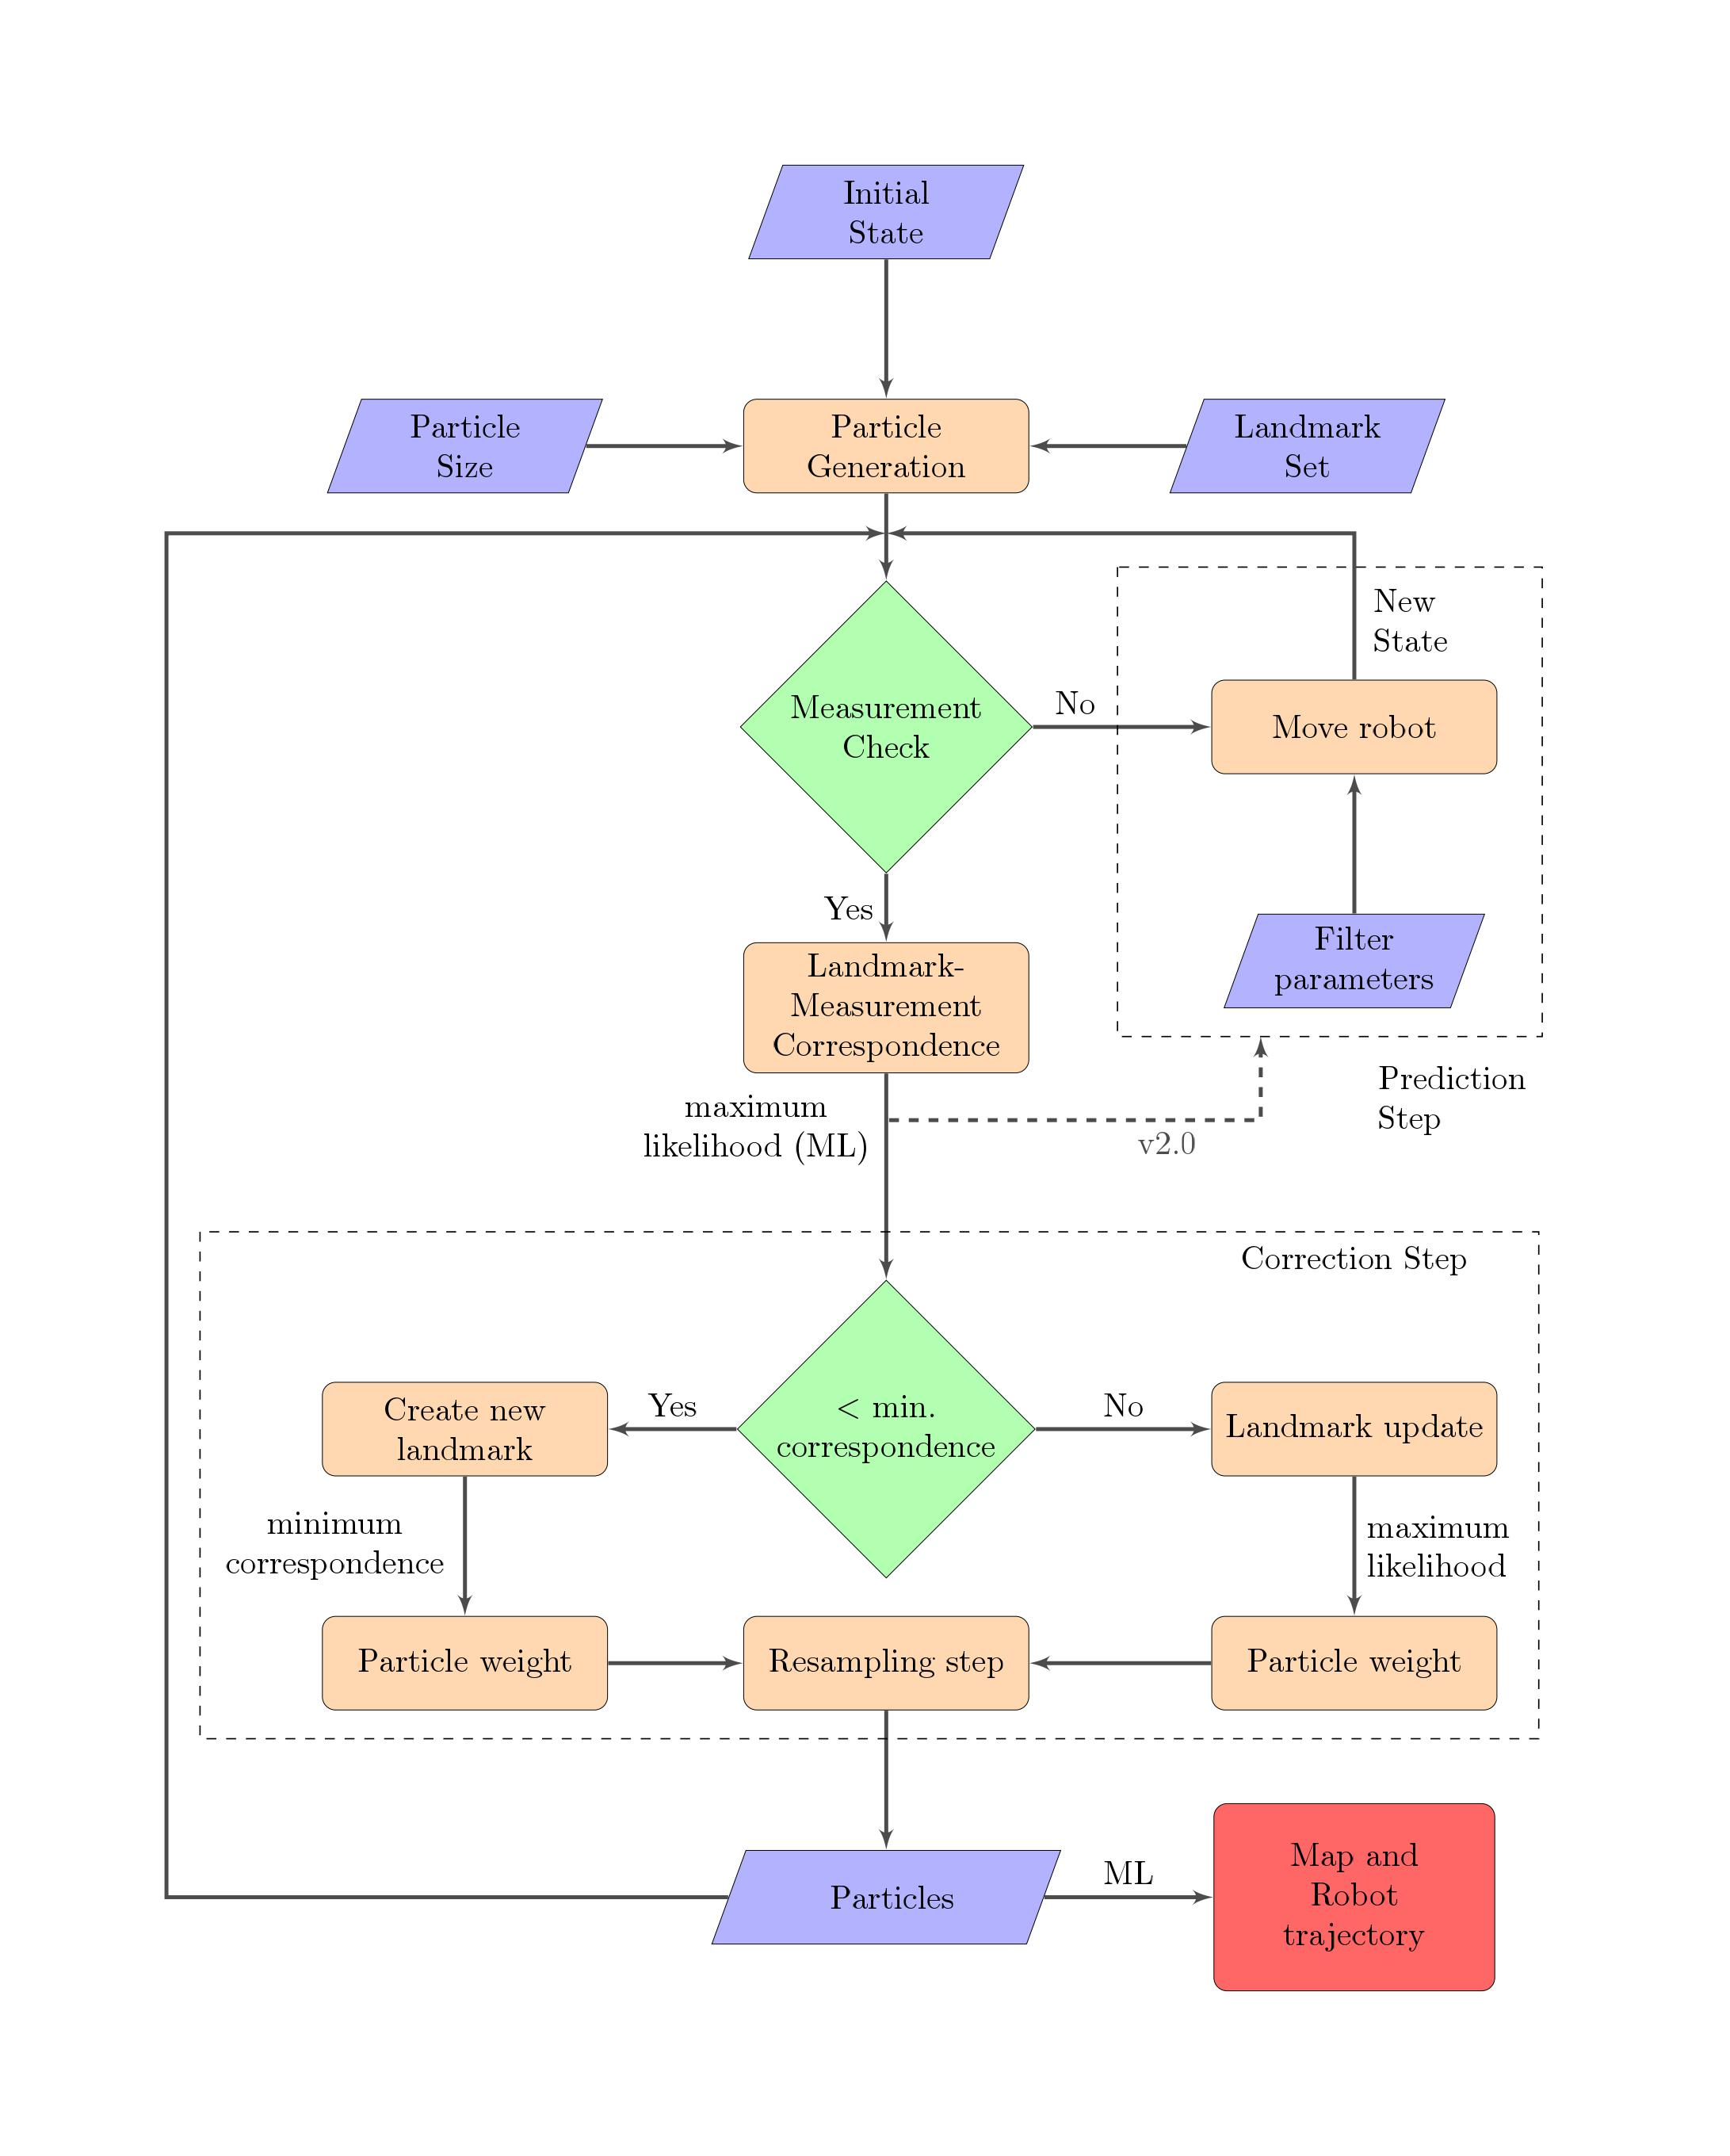

In [9]:
from IPython.display import Image
Image(filename='algorithm.jpg',width=900)

## First Solution to FastSLAM

## True Collision values

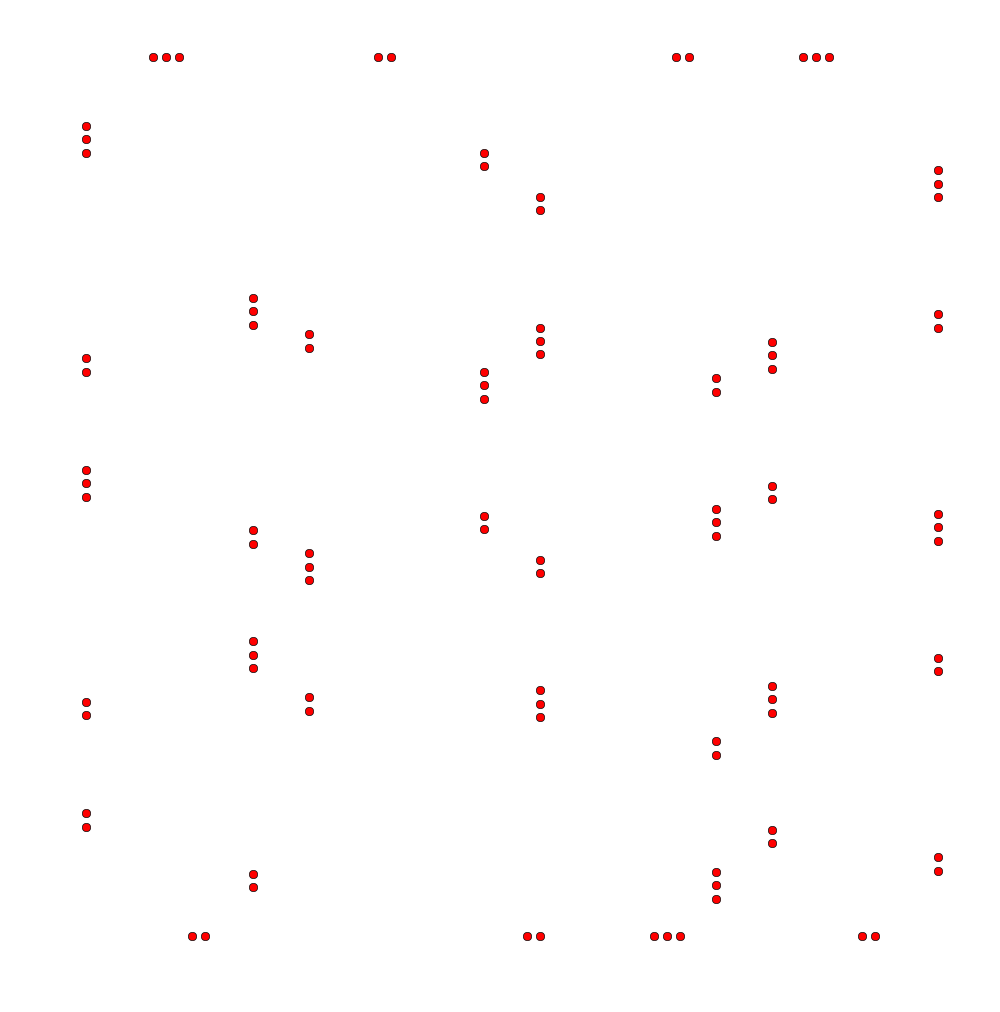

In [4]:
from IPython.display import Image
Image(filename='traj_true.png',width=700)

## Estimated Map from FastSLAM

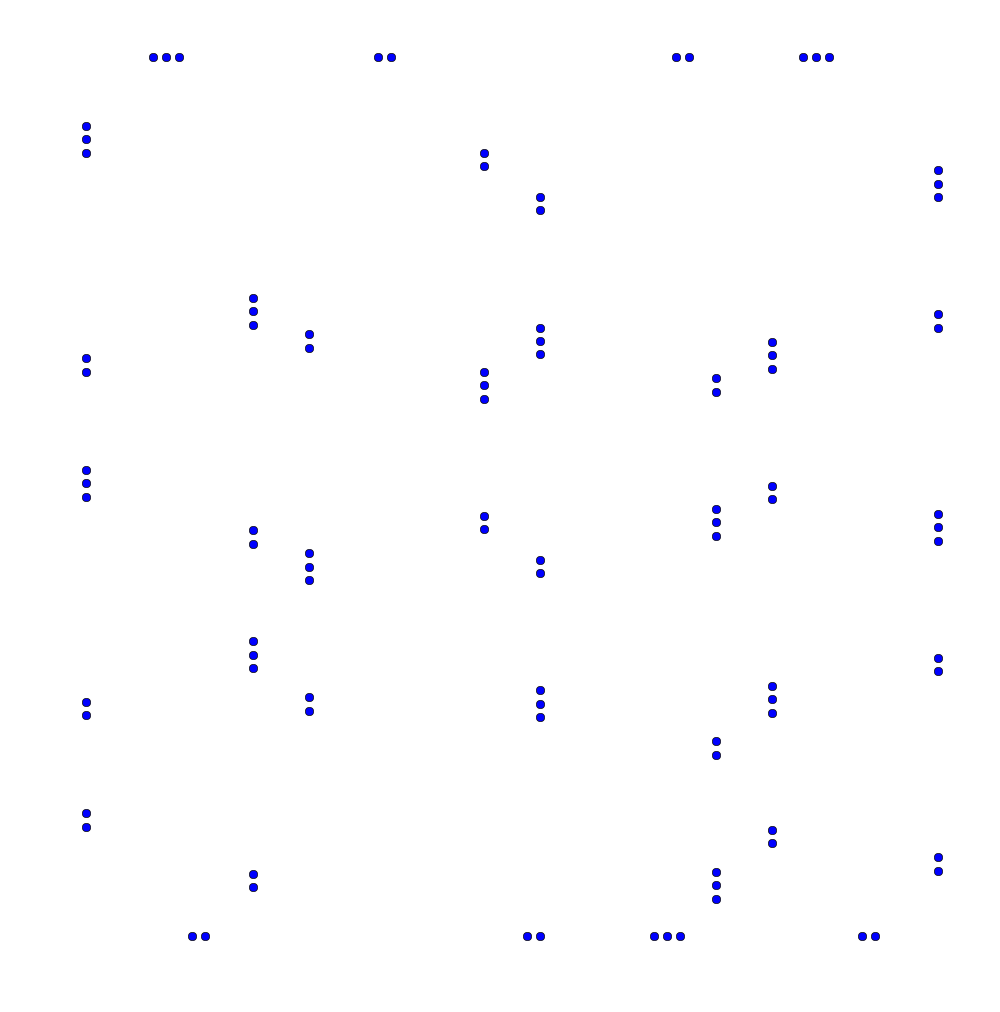

In [5]:
from IPython.display import Image
Image(filename='traj_est.png',width=700)

Monday - Tuesday, May $4^{th}-5^{th}$, 2015
----

### Feature Initialization
1. Gaussian point features will be no more suitable since there was not a single landmark update
    - This can be eliminated by selectively updating based on the covariance of landmark on each axis
    - A brittle method
    - Inclusion of explicit constraints in the correction step, which involves degeneracy in addition to prediction-based measurements
2. Gaussian point features has to define multiple mixture componenets, which are difficult to maintain over individual particles
3. Wall discontinuities cannot be easily pruned in Gaussian hypothesis as it involves eliminating a hypothesis
4. There are two possibilities to go ahead
    - Grid-based mapping techniques
    - Particle-based mapping
    
### Grid-based mapping (Official FastSLAM)
This technique involves defining the map as an occupancy grid
   - Rasterize the entire map as a grid
   - Lot of book-keeping
       - Map maintained over individual particle
       - Gives the most accurate map
       
### Particle-based mapping
Each particle in the FastSLAM algorithm contains a map, which individually contains child particles of the features in the map

## Best of All
1. Feature based mapping
    - All the features are maintained in a tree
2. Rasterize over the feature to improve the accuracy of the map
    - Easy to prune
    - Easy to merge maps
3. Degeneracy over the particles can be reduced by including the measurement in the prediction step
4. Breakdown of the proposed algorithm
    - Particles are used for localizing the robot
    - Each particle maintains a map hypothesis in addition to the robot trajectory
    - Each hypothesis is defined as a tree data structure
    - The leaf nodes of the tree contain the individual features of the map
    - The leaf nodes is a histogram, which is propagated over the set of measurements in the algorithms
    - The final map and robot trajectory is obtained using the maximum likelihood 

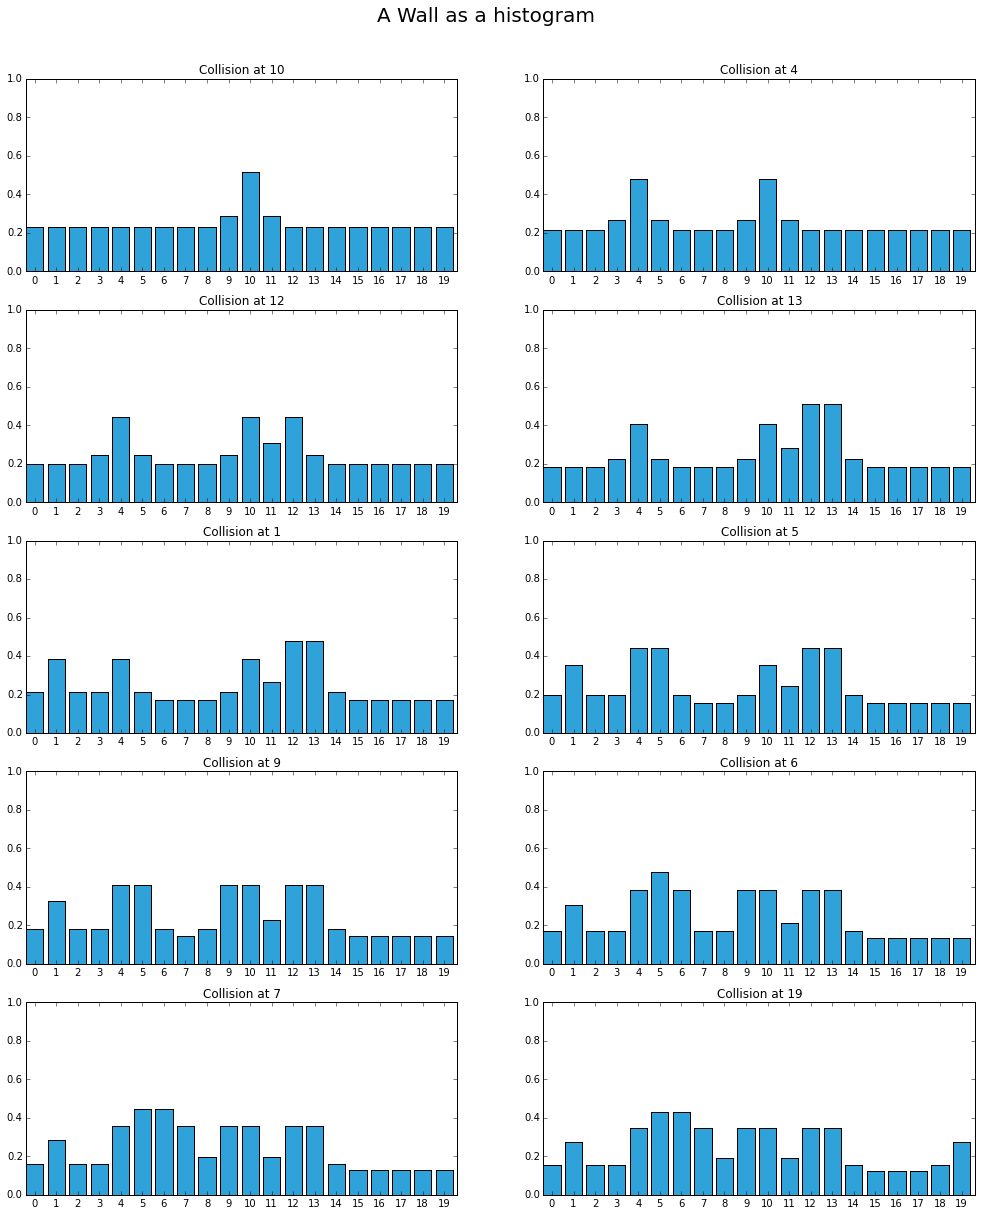

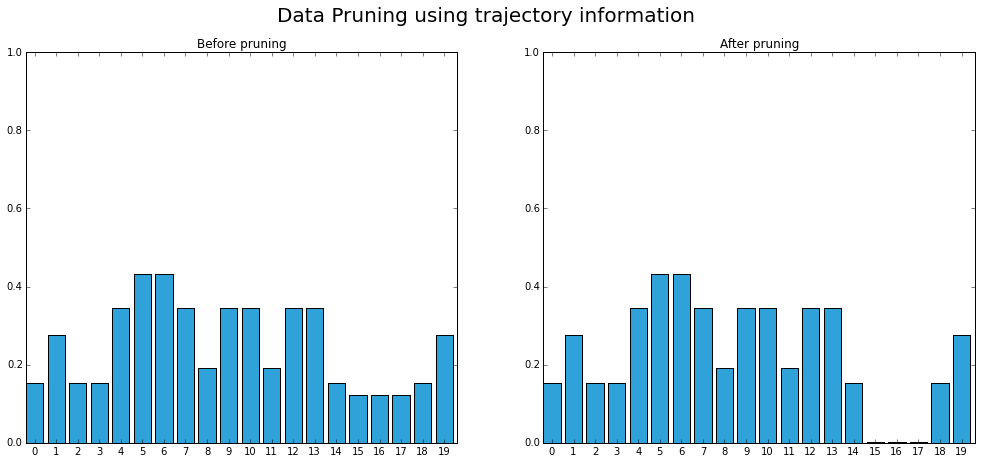

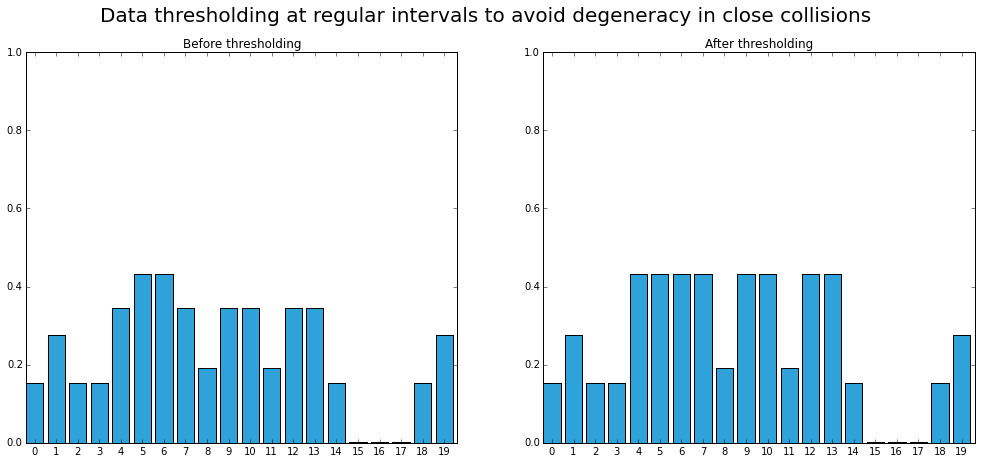

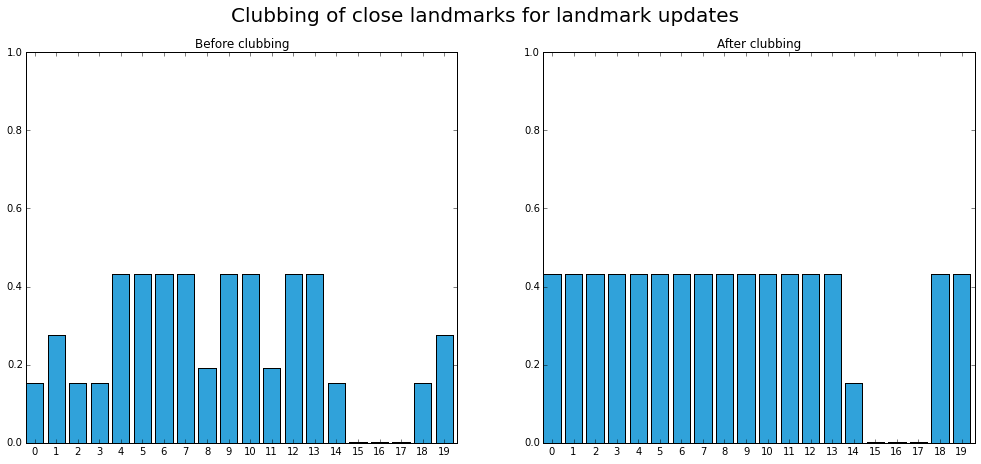

Final look of the wall in map


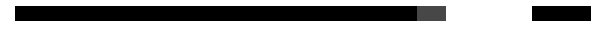

In [20]:
# Python code for using wall features as a histogram and in future, use histogram filter (discrete Bayes filter) for features 
# in SLAM
%run histogram_filter_wall_hypothesis.ipynb